In [ ]:
import sys
import importlib

import numpy as np
import pandas as pd
import xarray as xr
import pvlib as pv
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
sns.set(style='whitegrid')
sns.set_palette('deep', color_codes=True)
sns.set_context('poster', font_scale=1.5)

In [20]:
%matplotlib inline

In [ ]:
%matplotlib notebook

In [5]:
sys.path.append('/home/travis/python_code/letkf_forecasting/')
import letkf_forecasting as lf

In [6]:
importlib.reload(lf)

<module 'letkf_forecasting' from '/home/travis/python_code/letkf_forecasting/letkf_forecasting.py'>

In [6]:
end = sun_rise_set['sunset'][0]
end = end.tz_localize('UTC').tz_convert('MST')
print(end)

NameError: name 'sun_rise_set' is not defined

In [15]:
goes15_azimuth

3.8484510006474966

(-60.0, 60.0, -60.0, 60.0)

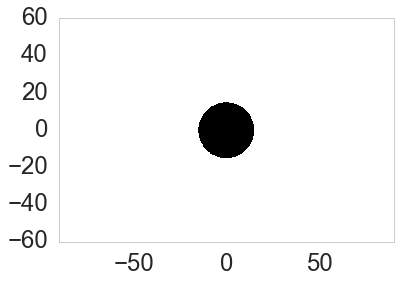

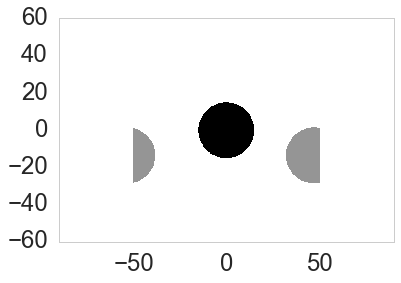

In [21]:
tus = pv.location.Location(32.2, -111, 'US/Arizona', 700,'Tucson')
sun_rise_set = pv.solarposition.get_sun_rise_set_transit(
    time='2014-04-15', latitude=tus.latitude, longitude=tus.longitude)

start = sun_rise_set['sunrise'][0]
start = start.tz_localize('UTC').tz_convert('MST')
start = start + pd.Timedelta('1hour')

end = sun_rise_set['sunset'][0]
end = end.tz_localize('UTC').tz_convert('MST')
end = end - pd.Timedelta('1hour')

# start = '2014-04-15 6:00:00'
# end = '2014-04-15 8:00:00'
times = pd.date_range(start=start, end=end, freq='2min')
cloud_height = 12000 #meters

#This is taken from http://www.groundcontrol.com/Satellite_Look_Angle_Calculator.html
goes15_azimuth = 220.5*(2*np.pi)/360
goes15_elevation = 44.1*(2*np.pi)/360


solar_position = tus.get_solarposition(times)
x_correct, y_correct = lf.parallax_shift(cloud_height,
                     goes15_azimuth,
                     goes15_elevation,
                     solar_position['azimuth'].values,
                     solar_position['elevation'].values)
temp = np.linspace(-50, 50, 400)
x, y = np.meshgrid(temp, temp)
circ = np.sqrt(x**2 + y**2)
circ[circ<=15] = 1
circ[circ>15] = 0
plt.figure()
plt.pcolormesh(x, y, circ, cmap='Greys')
plt.axis('equal')
# plt.axis('equal')
# plt.figure()
temp = np.roll(circ,
               (int(np.rint(y_correct[-1]/250)), int(np.rint(x_correct[-1]/250))),
               axis=(0, 1))*.5 + circ

plt.figure()
plt.pcolormesh(x, y, temp, cmap='Greys')
plt.axis('equal')

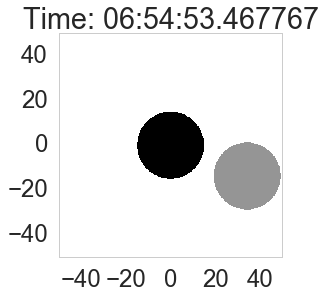

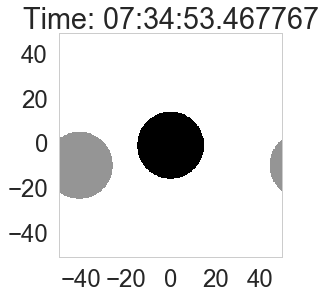

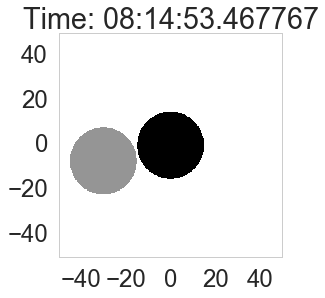

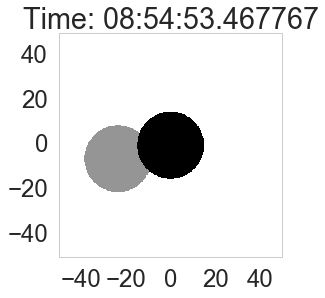

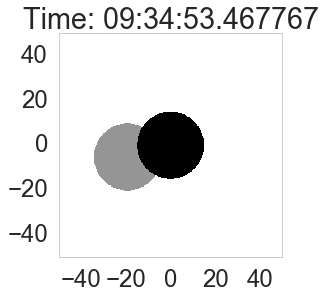

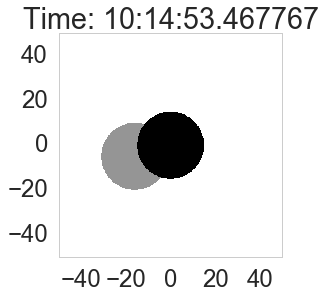

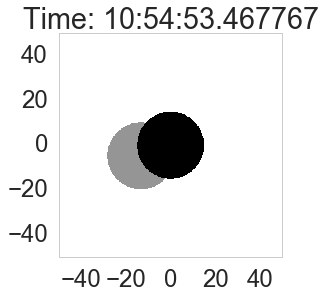

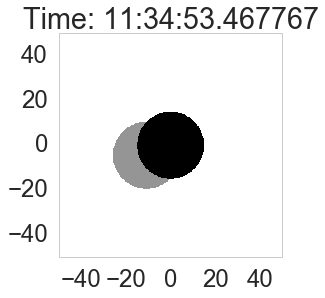

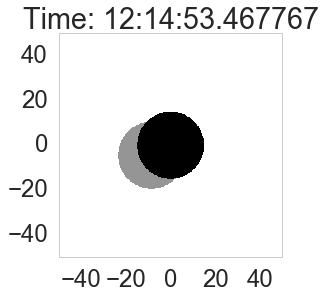

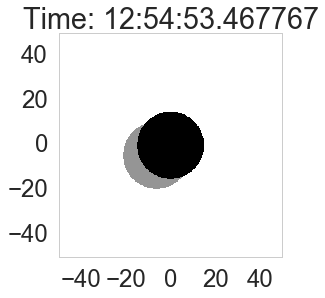

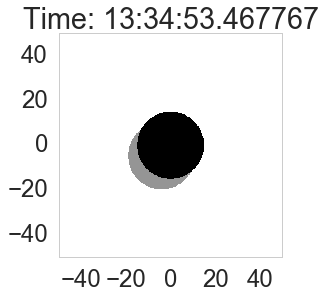

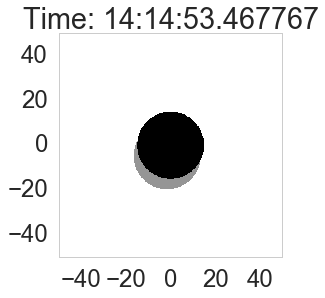

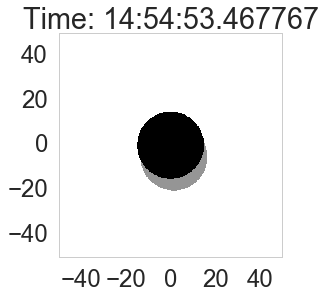

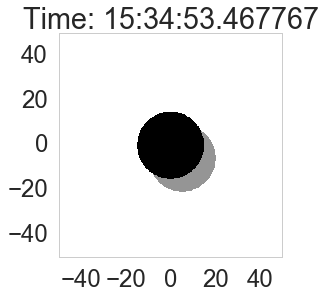

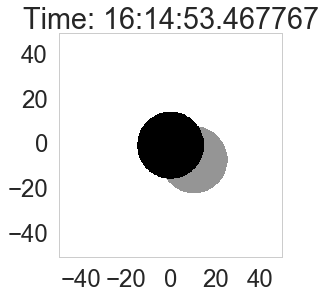

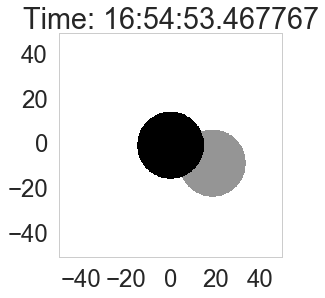

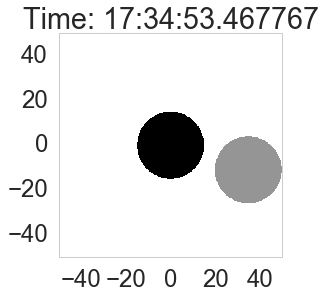

In [23]:
for t in np.arange(x_correct.size)[::20]:
    temp = np.roll(circ,
                   (int(np.rint(y_correct[t]/250)), int(np.rint(x_correct[t]/250))),
                   axis=(0, 1))*.5 + circ
    temp = temp.clip(max=1)
    fig, ax = plt.subplots()
    ax.pcolormesh(x, y, temp, cmap='Greys')
    plt.axis('equal')
    plt.title('Time: ' + str(times[t].time()))
#     plt.axis([-50 - 369/2, 50 + 369/2, -50 - 230/2, 50 + 230/2])
    plt.axis([-50, 50, -50, 50])
    ax.set(adjustable='box-forced', aspect='equal')
#     plt.savefig('paralax_movie/zfig{0:04}.png'.format(t))
#     plt.close('all')
    plt.show()